In [5]:
import matplotlib.pyplot as plt
import pandas as pd

combustiveis_df = pd.read_excel("ca-2021-02.xlsx")

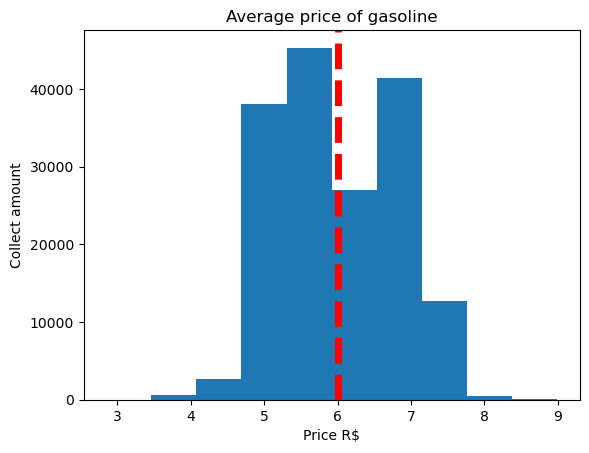

In [10]:
plt.hist(combustiveis_df['Valor de Venda'])
plt.title("Average price of gasoline")
plt.xlabel("Price R$")

#Vertical red line showing the average price
plt.axvline(combustiveis_df['Valor de Venda'].mean(), color='red', linestyle='dashed', linewidth=5)

plt.ylabel("Collect amount")
plt.show()


In [11]:
#View of average consumption
c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

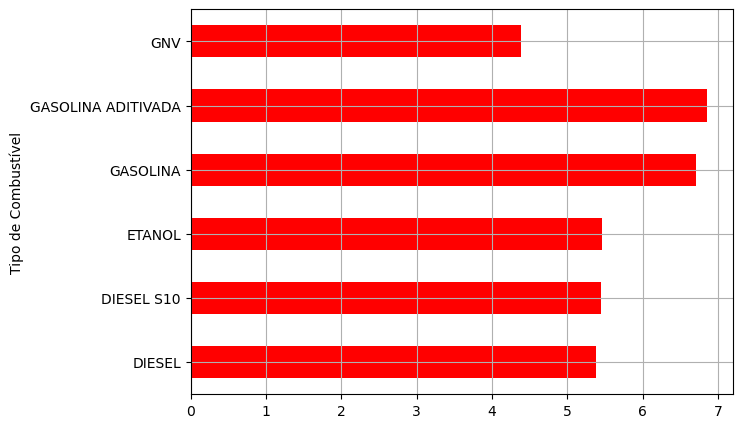

In [13]:
#Setting the area
plt.figure(figsize=(7,5))

#Plot the graphic
c_mean.plot(
    kind="barh",
    xlabel="Tipo de Combustível",
    ylabel="Preço reais/litro",
    color="red"
)

plt.grid()

plt.show()

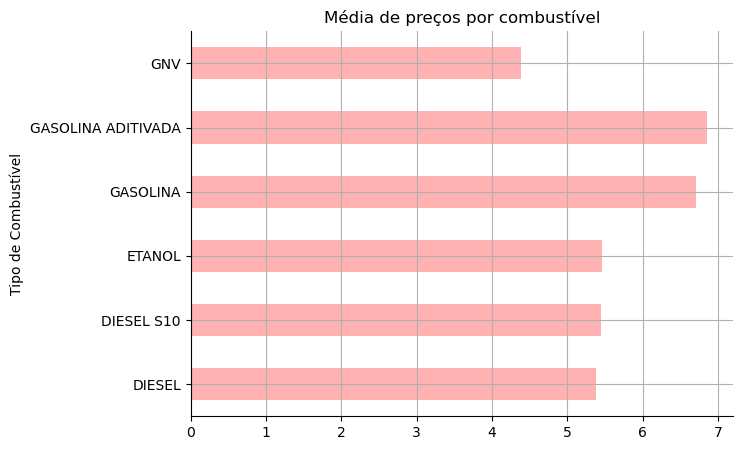

In [15]:
import seaborn as sns

#Setting the area
plt.figure(figsize=(7,5))

#Plot the graphic
c_mean.plot(
    kind="barh",
    xlabel="Tipo de Combustível",
    ylabel="Preço reais/litro",
    title="Média de preços por combustível",
    color="red",
    alpha=0.3
)

plt.grid()

#Remove top and right lines
sns.despine()

plt.show()

In [16]:
#c_mean.reset_index(inplace=True)
display(c_mean)

excel = "por_litro.xlsx"
c_mean.to_excel(excel, "Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

In [24]:
#Customizing the excel document
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

#Open the excel on openpyxl
wb = load_workbook(excel) # wb = Workbook

#Get the right excel document 
ws = wb['Sumário']

#Paiting 
cinza = PatternFill("solid", fgColor="CCCCCC")
coords = ['A1', 'B1']
for coord in coords:
  ws[coord].fill = cinza

#Where price >= 6,5 the font turns into bold red.
MAX_ROW = ws.max_row
num_linha = 2
while (num_linha <= MAX_ROW):
  coord = 'B'+str(num_linha) #coord="B{0}".format(num_linha)
  if ws[coord].value >= 6.5:
    ws[coord].font = Font(bold=True, color="FF0000")
  num_linha = num_linha + 1

#Saving
wb.save(excel)